In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import scipy.stats as st
import numpy as np
import random

In [2]:
file='cvs_output.csv'

file_one = pd.read_csv(file)
file_one

,Unnamed: 0,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,10,July 2 - July 7,32.3,28.2,36.6,28.2 - 36.6,31.4-32.9
1996,1996,Symptoms of Anxiety Disorder,By State,Kentucky,Kentucky,10,July 2 - July 7,36.3,31.2,41.6,31.2 - 41.6,35.4-40.6
1997,1997,Symptoms of Anxiety Disorder,By State,Louisiana,Louisiana,10,July 2 - July 7,38.6,34.2,43.1,34.2 - 43.1,35.4-40.6
1998,1998,Symptoms of Anxiety Disorder,By State,Maine,Maine,10,July 2 - July 7,32.8,29.0,36.7,29.0 - 36.7,31.4-32.9


In [3]:
kansas_df = file_one.loc[file_one["state"] == "Kansas", :]
kansas_df['indicator'].value_counts()
kansas_df

missouri_df=file_one.loc[file_one['state']=='Missouri']
missouri_df

ks_mo=pd.merge(kansas_df,missouri_df, how='outer')
ks_mo

cleaned_KsMo=ks_mo[['indicator','state','week','value']]
cleaned_KsMo

cleaned=cleaned_KsMo.groupby(['week','indicator'])
cleaned.count().head(10)

state_mean=cleaned['value'].mean()
final=pd.DataFrame({'KS & MO Average(%)':state_mean})
final.head()


KS & MO Average(%)
week indicator                                                             
1    Symptoms of Anxiety Disorder                                     28.40
     Symptoms of Anxiety Disorder or Depressive Diso...               33.85
     Symptoms of Depressive Disorder                                  21.55
2    Symptoms of Anxiety Disorder                                     31.45
     Symptoms of Anxiety Disorder or Depressive Diso...               34.65

In [4]:
#chart for kansas 
new_name_df= file_one[["indicator", "state", "week","value"]].copy()
new_name_df[:3] 

,indicator,state,week,value
0,Symptoms of Depressive Disorder,United States,1,23.5
1,Symptoms of Depressive Disorder,United States,1,32.7
2,Symptoms of Depressive Disorder,United States,1,25.7


In [5]:
#kansas_df.dtypes
kansas_df["week"]
ks_wks= kansas_df.groupby("indicator")["week"].count()
ks_wks


indicator
Symptoms of Anxiety Disorder                           10
Symptoms of Anxiety Disorder or Depressive Disorder     9
Symptoms of Depressive Disorder                        10
Name: week, dtype: int64

KeyError: 'week'

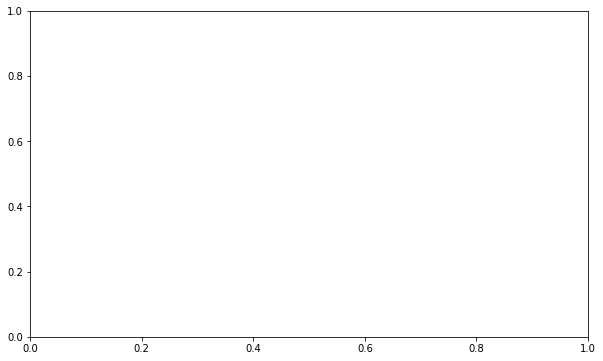

In [13]:
ks_wks= kansas_df.groupby("indicator")["week"].mean()

figure = plt.subplots(figsize=(10, 6))

plt.scatter(ks_wks["week"],s=100, color="gold",marker_size=10, marker="*" )

plt.show()

In [ ]:
ks_wks.plot(kind="bar", color=["steelblue","c","lightblue"], width=.40, edgeColor=('black'), linestyle='-')
plt.xlabel("values" )
plt.ylabel("Weeks")
plt.xticks(rotation=45, horizontalalignment="right")

In [ ]:
#chart for kansas 
Mo_df = new_name_df.loc[(new_name_df["state"]=='Missouri')]
#kansas_df[['indicator', 'week']].value_counts()
Mo_df[:3]

In [ ]:
# ks_wks= kansas_df.groupby("indicator")["week"].count()
# ks_wks.plot(kind="barh")
# plt.xticks(rotation=45, horizontalalignment="right")
# plt.y("Weeks")

In [ ]:
cleaned_all_states=cleaned_all_states.groupby("indicator")["week"].count()
cleaned_all_states.plot

cleaned_all_states.plot(kind="barh", fontsize=(14), color=["steelblue","darkred","steelblue"], width=.3, 
                        edgeColor=("black"), figsize=(10,5), linestyle='-')
plt.xlabel(("Weeks"),color="black", fontsize=12)

In [ ]:
all_states=file_one.loc[(file_one['state']=='United States')]
all_states

cleaned_all_states=all_states[['indicator','state','week', 'value']].copy()
cleaned_all_states


In [14]:
cleanedAll=cleaned_all_states.groupby(['week','indicator'])
cleanedAll.count().head(10)

country_mean=cleanedAll['value'].mean()
final_total=pd.DataFrame({'National Average(%)':country_mean})
final_total.head()

NameError: name 'cleaned_all_states' is not defined

In [ ]:
# # fig=plt.figure(figsize=(35,25))
# ks_value= kansas_df.groupby("value")["indicator"].count()
# ks_value.plot(kind="barh")
# plt.xticks(rotation=45, horizontalalignment="right")
# df = kansas_df[['indicator','value']]
# df.plot(kind = 'bar')

In [ ]:
ks_wks= kansas_df.groupby("indicator")["value"].count()
# figsize= (15,8)
# x_limit = 100
# x_axis = np.arange(0, x_limit, 1)
# ks_wks = [kansas_df.groupby() for value in x_axis]  

plt.scatter(x_axis, data, marker="o", facecolors="lightblue", edgecolors="black",
           alpha=0.75)

plt.xticks(rotation=45, horizontalalignment="right")

# figure = plt.subplots(figsize=(15,6))
# plt.title('Kansas Percentages',fontsize =14)
# plt.plot(kansas_df,linewidth=1, markersize=10, marker="*",color="gold")

# plt.show()
